In [ ]:
import numpy as np
import matplotlib.pyplot as mtp    
import pandas as pd    
import tensorflow as tf

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Data/IDMT_alltrucks_RMSE.csv")

In [ ]:
df

,Unnamed: 0,file,is_background,date_time,location,speed_kmh,sample_pos,daytime,weather,vehicle,source_direction,microphone,channel,mfcc_feature
0,0,2019-11-13-15-55_Schleusinger-Allee_70Kmh_2473...,False,2019-11-13-15-55,Schleusinger-Allee,70,2473197,A,D,T,R,SE,CH34,"[0.01421475037932396, 0.019523706287145615, 0...."
1,1,2019-11-19-08-30_Langewiesener-Strasse_50Kmh_1...,False,2019-11-19-08-30,Langewiesener-Strasse,50,1009688,M,D,T,R,SE,CH34,"[0.005629489663988352, 0.008286668919026852, 0..."
2,2,2019-11-18-16-40_Langewiesener-Strasse_50Kmh_1...,False,2019-11-18-16-40,Langewiesener-Strasse,50,180216,A,D,T,R,SE,CH34,"[0.008609752170741558, 0.011832940392196178, 0..."
3,3,2019-11-19-07-25_Langewiesener-Strasse_50Kmh_2...,False,2019-11-19-07-25,Langewiesener-Strasse,50,2609792,M,D,T,L,SE,CH34,"[0.013976510614156723, 0.02014055661857128, 0...."
4,4,2019-11-12-16-00_Schleusinger-Allee_70Kmh_2723...,False,2019-11-12-16-00,Schleusinger-Allee,70,272312,A,W,T,R,SE,CH34,"[0.016683457419276237, 0.022874865680933, 0.02..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,506,2019-11-19-16-30_Langewiesener-Strasse_50Kmh_1...,False,2019-11-19-16-30,Langewiesener-Strasse,50,1565024,A,D,T,L,SE,CH34,"[0.010653178207576275, 0.01503085345029831, 0...."
507,507,2019-10-23-16-20_Fraunhofer-IDMT_30Kmh_1649048...,False,2019-10-23-16-20,Fraunhofer-IDMT,30,1649048,A,D,T,L,SE,CH34,"[0.027255168184638023, 0.040500007569789886, 0..."
508,508,2019-11-18-15-45_Langewiesener-Strasse_50Kmh_2...,False,2019-11-18-15-45,Langewiesener-Strasse,50,2800280,A,D,T,L,SE,CH34,"[0.00855175219476223, 0.012304519303143024, 0...."
509,509,2019-11-18-16-40_Langewiesener-Strasse_50Kmh_1...,False,2019-11-18-16-40,Langewiesener-Strasse,50,1199528,A,D,T,L,SE,CH34,"[0.006329944357275963, 0.008125674910843372, 0..."


In [ ]:
# df['mfcc_feature'] = df['mfcc_feature'].astype(float)

In [ ]:
X=np.load('/content/drive/MyDrive/Data/features_alltrucks_RMSE.npy')
print(np.shape(X))

(511, 87)


In [ ]:
z=X

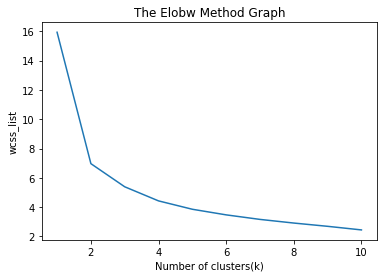

In [ ]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(z)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [ ]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(z)  #511,1

In [ ]:
y_predict


array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

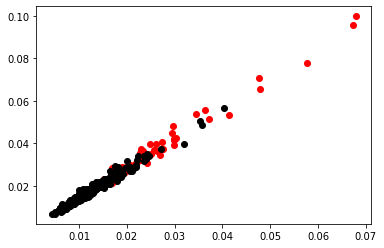

In [ ]:
import matplotlib.pyplot as plt
#filter rows of original data
filtered_label2 = z[y_predict == 0]
 
filtered_label8 = z[y_predict == 1]
# filtered_label9 = z[y_predict == 2]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
# plt.scatter(filtered_label9[:,0] , filtered_label9[:,1] , color = 'blue')
plt.show()

In [ ]:
a=y_predict
count=0
list0=[]
list1=[]
for label in a:
  if label==0:
    list0.append(count)
  else:
    list1.append(count)
  count=count+1    


In [ ]:
print(list0)
print(list1)
print(len(list0))
print(len(list1))

[4, 5, 6, 11, 13, 24, 25, 36, 37, 39, 43, 54, 62, 72, 74, 78, 86, 102, 106, 113, 115, 121, 132, 139, 146, 151, 156, 166, 170, 175, 195, 198, 210, 223, 234, 243, 279, 287, 295, 301, 302, 311, 317, 319, 327, 329, 330, 334, 335, 336, 342, 361, 362, 371, 399, 418, 421, 430, 433, 455, 456, 461, 464, 469, 483, 495, 507]
[0, 1, 2, 3, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 107, 108, 109, 110, 111, 112, 114, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184

In [ ]:
for i in range(511):
  if i in list0:
    print(df['file'][i])

2019-11-12-16-00_Schleusinger-Allee_70Kmh_272312_A_W_TR_SE_CH34
2019-11-18-07-25_Langewiesener-Strasse_50Kmh_1270664_M_D_TR_SE_CH34
2019-11-19-16-30_Langewiesener-Strasse_50Kmh_738440_A_D_TL_SE_CH34
2019-11-12-16-00_Schleusinger-Allee_70Kmh_54056_A_W_TL_SE_CH34
2019-11-19-15-25_Langewiesener-Strasse_50Kmh_679672_A_D_TL_SE_CH34
2019-11-19-16-30_Langewiesener-Strasse_50Kmh_1899152_A_D_TL_SE_CH34
2019-10-23-08-35_Fraunhofer-IDMT_30Kmh_657304_M_D_TR_SE_CH34
2019-11-12-09-00_Schleusinger-Allee_70Kmh_3188120_M_W_TR_SE_CH34
2019-11-18-07-25_Langewiesener-Strasse_50Kmh_1206344_M_D_TL_SE_CH34
2019-11-12-10-00_Schleusinger-Allee_70Kmh_102424_M_W_TL_SE_CH34
2019-11-13-08-00_Schleusinger-Allee_70Kmh_1033496_M_W_TL_SE_CH34
2019-11-19-16-30_Langewiesener-Strasse_50Kmh_1801448_A_D_TL_SE_CH34
2019-11-18-15-45_Langewiesener-Strasse_50Kmh_775784_A_D_TL_SE_CH34
2019-11-13-15-55_Schleusinger-Allee_70Kmh_307533_A_D_TL_SE_CH34
2019-11-13-08-00_Schleusinger-Allee_70Kmh_1982744_M_W_TL_SE_CH34
2019-11-12-10-00